In [27]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(length, weight,random_state=42)

In [34]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [35]:
# k최근접
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [36]:
kn.predict([[50]])

array([1010.])

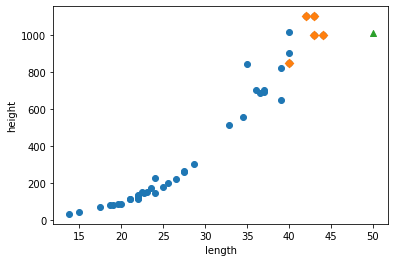

In [37]:
import matplotlib.pyplot as plt
distance,indexes =  kn.kneighbors([[50]])
plt.scatter(x_train,y_train)
plt.scatter(x_train[indexes], y_train[indexes], marker="D")
plt.scatter(50.0,1010.0, marker='^')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

In [38]:
np.mean(y_train[indexes])

1010.0

In [40]:
kn.predict([[100]])

array([1010.])

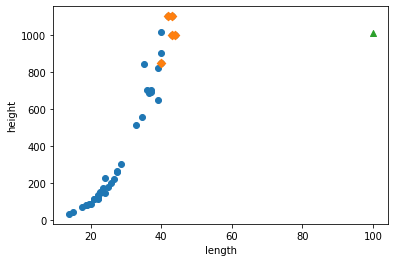

In [41]:

distance,indexes =  kn.kneighbors([[100]])
plt.scatter(x_train,y_train)
plt.scatter(x_train[indexes], y_train[indexes], marker="D")
plt.scatter(100.0,1010.0, marker='^')
plt.xlabel('length')
plt.ylabel('height')
plt.show()

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
lr.predict([[50]])

array([1241.83860323])

In [31]:
lr.score(x_train,y_train), lr.score(x_test, y_test)
x_50_predict = lr.predict([[50]])
x_50_predict

array([1211.00217136])

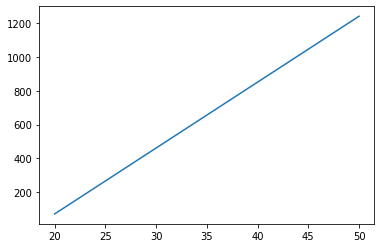

In [44]:
lr.coef_, lr.intercept_
plt.plot([20,50], [20*lr.coef_+lr.intercept_, 50*lr.coef_+ lr.intercept_])
plt.show()

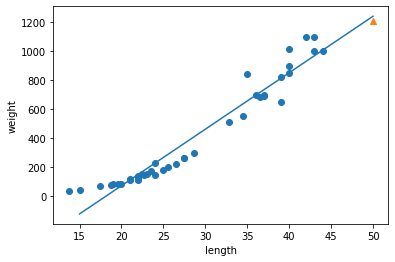

In [46]:

plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+ lr.intercept_])
plt.scatter(x_train,y_train)
plt.scatter(50,x_50_predict,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
lr.score(x_train, y_train), lr.score(x_test,y_test)

(0.9398463339976041, 0.824750312331356)

In [48]:
lr.predict([[10]])

array([-318.84719532])

In [49]:
# 길이를 가지고 무계예측  y = ax +b 
# 다차원 방적식 y = ax2+bx+c

In [54]:
# 무계 = ax 길이**2 + bx길이 + c
x_train_poly =  np.column_stack(( x_train**2, x_train))
x_test_poly =  np.column_stack(( x_test**2, x_test))

In [55]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

LinearRegression()

In [72]:
x_10_predict = lr.predict([[10**2,10]])
x_50_predict = lr.predict([[50**2,50]])
x_50_predict

array([1573.98423528])

In [69]:
lr.coef_, lr.intercept_
lr.coef_[0],lr.coef_[1],lr.intercept_

(1.0143321093767301, -21.557924978837352, 116.0502107827827)

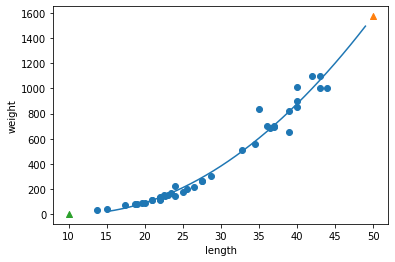

In [73]:
x = np.arange(15,50)

plt.plot(x, lr.coef_[0]*x**2 + lr.coef_[1]*x + lr.intercept_)
plt.scatter(x_train,y_train)
plt.scatter(50,x_50_predict,marker="^")
plt.scatter(10,x_10_predict,marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()